In [29]:
import json
# loads a file into jupyter
with open('/Users/lincolntrelease/Desktop/secrets/secrets/credentials.json') as f:
    data = json.load(f)

    connection_string = data['mongodb']
# verifies my file has loaded correctly
print(f"My connection string is {len(connection_string)} characters in length.")

My connection string is 68 characters in length.


In [30]:
pip install pymongo


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pymongo
import certifi

mongo_connection_string = data['mongodb']

client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

da320_database = client['DA_Assignment']

allCollections = da320_database.list_collection_names()

print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.11.
This database has the collections ['Metacritic Movies', 'IMDB Superhero']


In [32]:
import re
import pandas as pd

query={
    'release_date': re.compile(r"2003")
}

cursor = da320_database['IMDB Superhero'].find(query)

imdb = pd.DataFrame(cursor)

imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,652c26a0db5b84b6e6994360,258816,The Reckoning,112,6.4,6074,R,8/6/2003,NaN,NaN,NaN,"Crime, Drama, Mystery","Paul Bettany, Marián Aguilera, Trevor Steedman...",Paul McGuigan,"Mark Albela, Stephen Evans, Angus Finney, Sara...","Kanzaman, M.D.A. Films S.L., Renaissance Films"
1,652c26a1db5b84b6e69944e4,319061,Big Fish,125,8.0,437002,TV-14,12/4/2003,70000000.0,207377.0,122919055.0,"Adventure, Drama, Fantasy, Romance","Ewan McGregor, Albert Finney, Billy Crudup, Je...",Tim Burton,"Bruce Cohen, Katterli Frauenfelder, Dan Jinks,...","Columbia Pictures, Jinks/Cohen Company, The Za..."
2,652c26a1db5b84b6e69944eb,328538,Thirteen,100,6.8,86744,R,1/17/2003,1500000.0,116260.0,NaN,Drama,"Nikki Reed, Evan Rachel Wood, Vanessa Hudgens,...",Catherine Hardwicke,"Tim Bevan, Liza Chasin, Eric Fellner, Canada J...","Fox Searchlight Pictures, Michael London Produ..."
3,652c26a1db5b84b6e69944f0,316396,Peter Pan,113,6.8,72462,PG,12/9/2003,100000000.0,NaN,121975011.0,"Adventure, Family, Fantasy, Romance","Jason Isaacs, Jeremy Sumpter, Rachel Hurd-Wood...",P.J. Hogan,"Gary Adelson, Mohamed Al-Fayed, Craig Baumgart...","Universal Pictures, Columbia Pictures, Revolut..."
4,652c26a1db5b84b6e69944f5,302886,Old School,88,7.0,228294,"TV-14::(DL, TV Rating.)",2/13/2003,24000000.0,17453216.0,87055349.0,Comedy,"Luke Wilson, Will Ferrell, Vince Vaughn, Jerem...",Todd Phillips,"Paul Deason, Daniel Goldberg, Joe Medjuck, Tod...","Dreamworks Pictures, The Montecito Picture Com..."


In [33]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


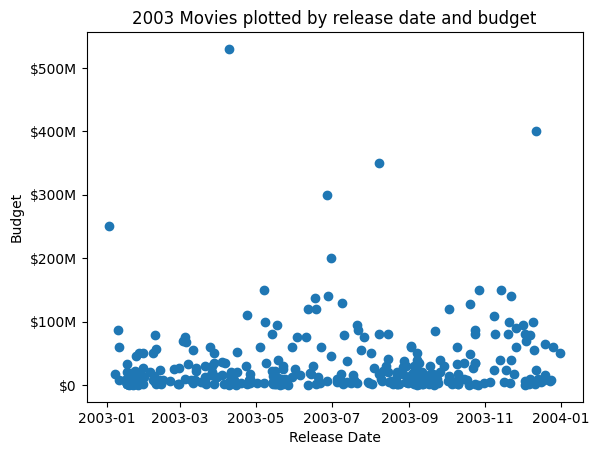

In [34]:
from matplotlib import pyplot
imdb.release_date = pd.to_datetime(imdb.release_date, errors='coerce')
imdb.budget = pd.to_numeric(imdb.budget, errors='coerce')
imdb.runtime= pd.to_numeric(imdb.runtime, errors='coerce')

def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

pyplot.title('2003 Movies plotted by release date and budget')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')
pyplot.scatter(imdb['release_date'], imdb['budget'])
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.show()



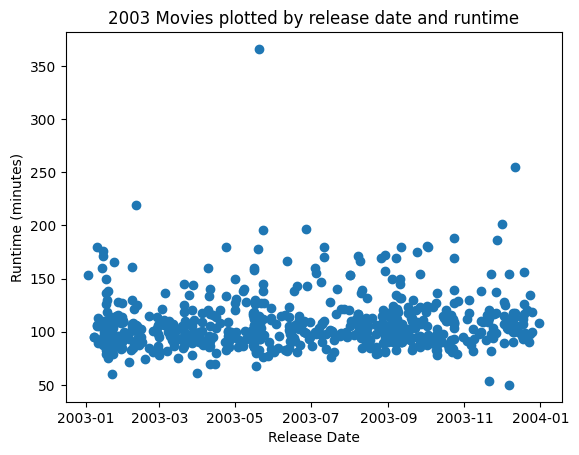

In [35]:
pyplot.title('2003 Movies plotted by release date and runtime')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime (minutes)')
pyplot.scatter(imdb['release_date'], imdb['runtime'])
pyplot.show()

Budget Outliers: When looking at outliers in terms of budget there are a couple movies that stand out. "The Hero: Love Story of a Spy", "Koi... Mil Gaya", and "LOC: Kargil". All three of these movies have a budget over 300 million and I would consider them outliers. After doing some research, it seems like the reason for these outliers is a different in currency. "The Hero: Love Story of a Spy" seems like it's budget is in Indian Rupees and not US dollars giving it a budget that stands out over the other movies released in 2003. This is also true with the other outliers. I suspect we could solve this by writing a function in jupyter to convert them to US dollars, this would give us a better picture of how they compare with the other movies, however i expect we would have to do this with other currencies as well. We could also exclude them and just look at movies with a like currency, but I suspect that might require a fair amount of research.  
Runtime Outliers : When it comes to runtime, "Loc: Kargil", and "The best of Youth" stand out as the top outliers. At 366 minutes, "The best of Youth" stands out as one of the longest movie in 2003 and one of the longest movies of all time. After doing some research, the long runtime seems to be the because of the story the directors wanted to portray. Even at 366 minutes, it stands out due to it's intricate story, and gets high praise. It is also divided into chapters which makes the long runtime easy to digest.